In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import copy
from pathlib import Path 

In [3]:
# Load the autoreload extension
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [4]:
# Imported the module
from Model_CAR_NK import Model_obj_CAR_NK as obj_CAR_NK
from Model_Wt_NK import Model_obj_WT_NK as obj_WT_NK
from fitting import Model_fit, Model_Pred
from imp_exp_data import new_data


In [5]:
Sys_CAR_Gen2 = obj_CAR_NK()
Sys_CAR_Gen4 = obj_CAR_NK()
Sys_WT_NK = obj_WT_NK()

In [6]:
file_path = Path.cwd().parents[0] / 'data/Kasumi1_HL60_CD33'
data_Kasumi1_4h = pd.read_excel(f'{file_path}/Donor_A_Av_Specific_Lysis_vs_ET.xlsx',dtype=object)
ET_ratio = data_Kasumi1_4h.iloc[:,0].values
ET_ratio_num = np.arange(len(ET_ratio))
data_Kasumi1_4h = data_Kasumi1_4h.iloc[:,1:]
mean_WT_Kasumi1, sd_WT_Kasumi1 = new_data(data_Kasumi1_4h[['Mean_WT','SD_WT']])
mean_Gen2_Kasumi1, sd_Gen2_Kasumi1 = new_data(data_Kasumi1_4h[['Mean_CAR_NK_Gen2','SD_CAR_NK_Gen2']])
mean_Gen4_Kasumi1, sd_Gen4_Kasumi1 = new_data(data_Kasumi1_4h[['Mean_CAR_NK_Gen4','SD_CAR_NK_Gen4']])

In [7]:
LB = np.array([1.0e-1,1.0e-1,100,0.1,1.0e-1,100,
               1.0e-2,
               1.0e-2,1.0e-2,
               1.5e-7])
UB = np.array([0.7,0.9,2.0e+3,1.0,1.0,2.0e+3,
               1.0,
               1.0,1.0,
               1.e-4])

In [8]:
opt = ['least_squares','minimize','pso']

In [9]:
def main_Kasumi1():
    MFI_limt = [[(0, 100), (0, 250), (0.0, 50.0)], [(0, 30), (7, 70), (2.0, 20.0)]]
    Sys_CAR_Gen4.Cell_type_R_L(NK_cell='CAR-NK A', Tumor_cell='Kasumi1',limts=MFI_limt,CAR_Gen='Gen4v2')
    MFI_limt = [[(0, 1000), (0, 250), (0.0, 50.0)], [(0, 30), (7, 70), (2.0, 20.0)]]
    Sys_CAR_Gen2.Cell_type_R_L(NK_cell='CAR-NK A', Tumor_cell='Kasumi1',limts=MFI_limt,CAR_Gen='Gen2')
    MFI_limt = [[(0, 10), (50, 300), (0.0, 30.0)], [(0, 30), (7, 70), (2.0, 20.0)]]
    Sys_WT_NK.Cell_type_R_L(NK_cell='WT', Tumor_cell='Kasumi1',limts=MFI_limt)
    x0 =[0.5534, 0.4138, 313.4, 0.1385, 0.3477, 1342.0, 0.2344, 0.01, 0.02133, 4.659e-05]
    model_sys = (Sys_CAR_Gen4,Sys_CAR_Gen2, Sys_WT_NK)
    data = (mean_Gen4_Kasumi1,mean_Gen2_Kasumi1, mean_WT_Kasumi1,ET_ratio)
    return Model_fit(x0,LB,UB,model_sys,data,optimizer=opt[0],fit=False)
res0 = main_Kasumi1()

----- Optimized Parameters (2 sig. digits) -----
[0.5534, 0.4138, 313.4, 0.1385, 0.3477, 1342.0, 0.2344, 0.01, 0.02133, 4.659e-05]
Cost = 29.1


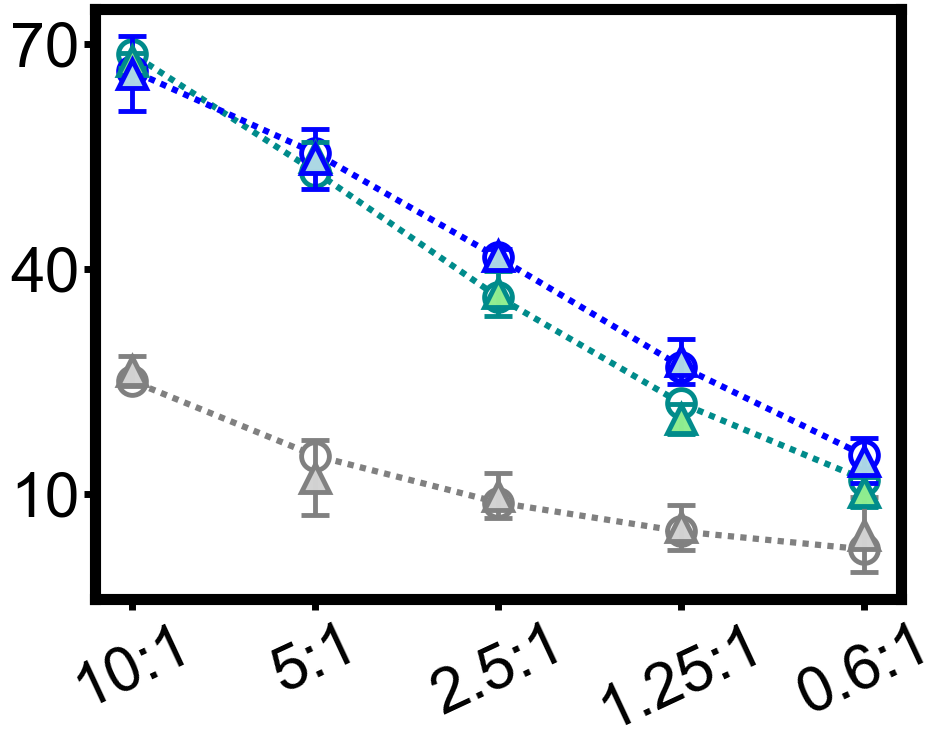

In [14]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res0[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0],label="Fit-Gen4")
plt.plot(ET_ratio_num, res0[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0],label="Fit-Gen2")
plt.plot(ET_ratio_num, res0[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0],label="Fit-WT")

plt.errorbar(ET_ratio_num, mean_Gen4_Kasumi1, yerr = sd_Gen4_Kasumi1, 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99)#,label="data-Gen4")
plt.errorbar(ET_ratio_num, mean_Gen2_Kasumi1, yerr = sd_Gen2_Kasumi1, 
             fmt='^', markersize=m_size, markerfacecolor='lightblue', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue',alpha=0.99)#,label="data-Gen2")

plt.errorbar(ET_ratio_num, mean_WT_Kasumi1, yerr = sd_WT_Kasumi1, 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray',alpha=0.99)#,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
plt.tight_layout(pad=2.5)
#plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right')#, labelcolor='white')
plt.savefig('Kasumi1_Donor_A_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

# Prediction HL60 Gen2 Gen4 by fitting WT

In [15]:
data_HL60_4h = pd.read_excel(f'{file_path}/Donor_A_Av_Specific_Lysis_vs_ET.xlsx',dtype=object,sheet_name=1)
data_HL60_4h = data_HL60_4h.iloc[:,1:]
mean_WT_HL60, sd_WT_HL60 = new_data(data_HL60_4h[['Mean_WT','SD_WT']])
mean_Gen2_HL60, sd_Gen2_HL60 = new_data(data_HL60_4h[['Mean_CAR_NK_Gen2','SD_CAR_NK_Gen2']])
mean_Gen4_HL60, sd_Gen4_HL60 = new_data(data_HL60_4h[['Mean_CAR_NK_Gen4','SD_CAR_NK_Gen4']])

In [16]:
LB = np.array([100,100,1.5e-7])
UB = np.array([25000,15000,1.0e-3])

In [18]:
def main_Pred():
    MFI_limt = [[(0, 100), (0, 250), (0.0, 50.0)], [(10, 80), (1e-5, 1.5), (0.0, 300.0)]]
    Sys_CAR_Gen4.Cell_type_R_L(NK_cell='CAR-NK A', Tumor_cell='HL60',limts=MFI_limt,CAR_Gen='Gen4v2')
    MFI_limt = [[(0, 600), (0, 250), (0.0, 50.0)], [(10, 80), (1e-5, 1.5), (0.0, 300.0)]]
    Sys_CAR_Gen2.Cell_type_R_L(NK_cell='CAR-NK A', Tumor_cell='HL60',limts=MFI_limt,CAR_Gen='Gen2')
    MFI_limt = [[(0, 10), (50, 300), (0.0, 30.0)], [(10, 80), (1e-5, 1.5), (0.0, 300.0)]]
    Sys_WT_NK.Cell_type_R_L(NK_cell='WT', Tumor_cell='HL60',limts=MFI_limt)
    x0 = [12330.0, 6494.0, 0.0001596]
    model_sys = (Sys_CAR_Gen4, Sys_CAR_Gen2, Sys_WT_NK)
    y0 = copy.deepcopy(res0[3])
    data = (mean_Gen4_HL60, mean_Gen2_HL60, mean_WT_HL60,ET_ratio,y0)
    return Model_Pred(x0,LB,UB,model_sys,data,fit=False,only_wt=True)
res1 = main_Pred()

----- Optimized Parameters (2 sig. digits) -----
[12330.0, 6494.0, 0.0001596]
Cost = 269
Total Cost: 744.6762231520493
Ftting prediction


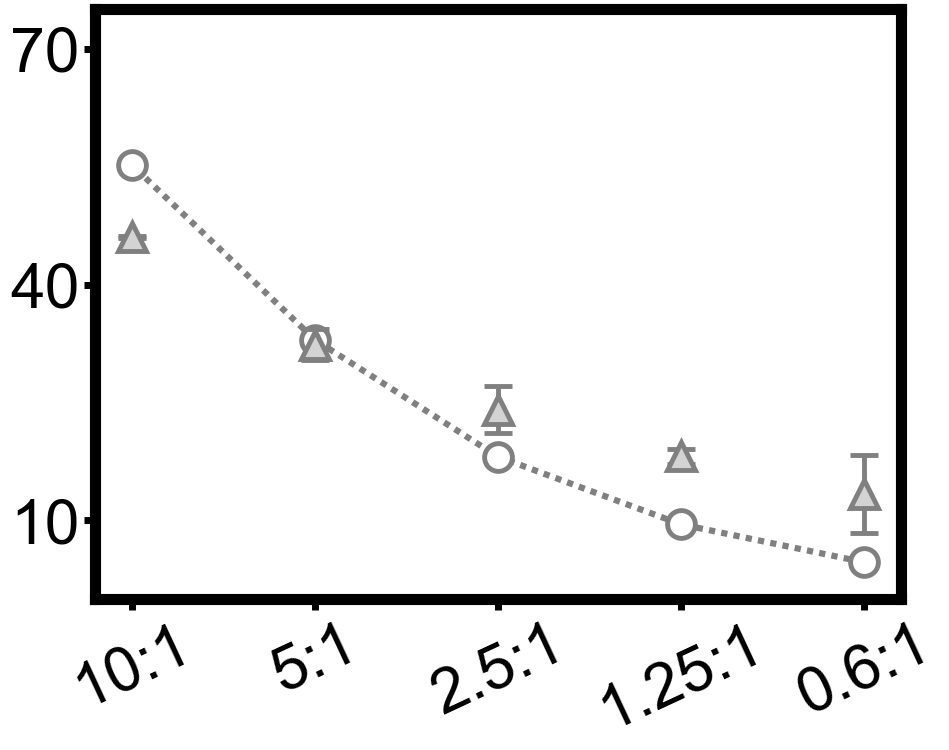

In [19]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res1[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0])#,label="Fit-WT")
plt.errorbar(ET_ratio_num, mean_WT_HL60, yerr = sd_WT_HL60, 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray')#,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
plt.ylim(0,75)
#plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.tight_layout(pad=2.5)
plt.savefig('HL60_WT_Donor_A_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

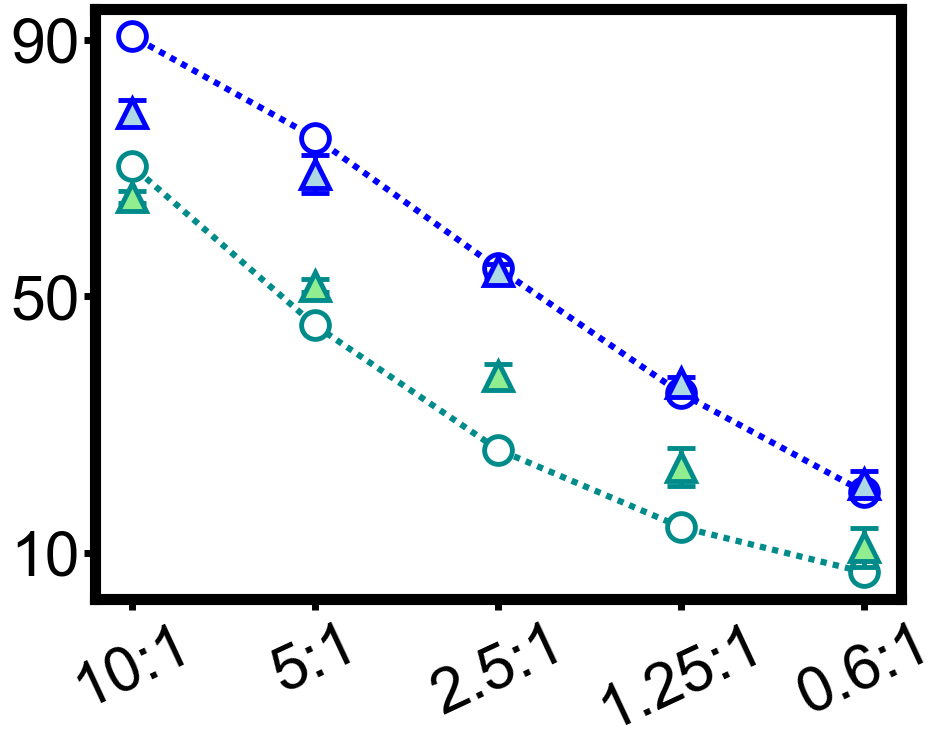

In [20]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res1[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0])#,label="pred-Gen4")
plt.plot(ET_ratio_num, res1[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0])#,label="pred-Gen2")

plt.errorbar(ET_ratio_num, mean_Gen4_HL60, yerr = sd_Gen4_HL60, 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan')#,label="data-Gen4")
plt.errorbar(ET_ratio_num, mean_Gen2_HL60, yerr = sd_Gen2_HL60, 
             fmt='^', markersize=m_size, markerfacecolor='lightblue', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue')#,label="data-Gen2")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size, rotation=25)
plt.yticks([10,50,90],fontname="Arial",fontsize = t_size)
#plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.tight_layout(pad=2.5)
plt.savefig('HL60_Pred_Donor_A_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

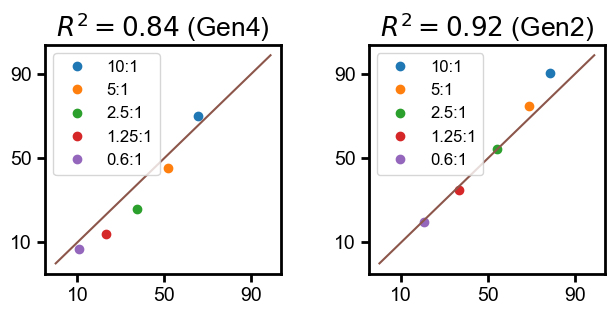

In [19]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 35
plt.rcParams['font.family'] = 'Arial'
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,4))

for i in range(len(res1[0])):
    ax1.plot(mean_Gen4_HL60[i], res1[0][i], 'o', label=f'{ET_ratio[i]}')
    ax2.plot(mean_Gen2_HL60[i], res1[1][i], 'o', label=f'{ET_ratio[i]}')

ax1.plot(np.arange(0,100),np.arange(0,100))
#ax1.set_xlabel('Data')
#ax1.set_ylabel('Prediction',fontsize =23)
ax1.set_xticks([10,50,90])
ax1.set_yticks([10,50,90])
ax1.set_title(f'$R^2 = {r2_score(mean_Gen4_HL60, res1[0]):.2f}$ (Gen4)',fontsize =19)
ax1.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax1.legend(prop = {'size':12})

ax2.plot(np.arange(0,100),np.arange(0,100))
#ax2.set_xlabel('Data')
#ax2.set_ylabel('Prediction',fontsize =25)
ax2.set_xticks([10,50,90])
ax2.set_yticks([10,50,90])
ax2.set_title(f'$R^2 = {r2_score(mean_Gen2_HL60, res1[1]):.2f}$ (Gen2)',fontsize =19)
ax2.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax2.legend(prop = {'size':12})
#plt.xlabel('x')
plt.tight_layout()
#plt.savefig('R2_Donor_A_CAN_NK_Pred.png')
plt.show()